# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | queenstown
Processing Record 2 of Set 1 | mont-tremblant
Processing Record 3 of Set 1 | fale old settlement
Processing Record 4 of Set 1 | vorkuta
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | chonchi
Processing Record 8 of Set 1 | luanda
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | cottonwood
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | agidel'
City not found. Skipping...
Processing Record 14 of Set 1 | kimbe
Processing Record 15 of Set 1 | sao vicente
Processing Record 16 of Set 1 | vilyuchinsk
Processing Record 17 of Set 1 | beroroha
Processing Record 18 of Set 1 | belmonte
Processing Record 19 of Set 1 | hamilton
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | port-aux-

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,queenstown,-31.8976,26.8753,15.14,82,100,3.76,ZA,1711737017
1,mont-tremblant,46.1949,-74.6264,7.77,36,86,2.06,CA,1711736609
2,fale old settlement,-9.3852,-171.2468,29.35,76,17,4.90,TK,1711737022
3,vorkuta,67.5000,64.0000,-11.41,96,100,4.22,RU,1711737048
4,adamstown,-25.0660,-130.1015,23.76,70,100,12.39,PN,1711737022
5,blackmans bay,-43.0167,147.3167,13.62,90,28,1.49,AU,1711737005
6,chonchi,-42.6128,-73.8092,14.56,62,46,3.25,CL,1711737057
7,luanda,-8.8368,13.2343,26.00,83,75,1.54,AO,1711736933
8,invercargill,-46.4000,168.3500,10.01,95,91,3.03,NZ,1711736946
9,cottonwood,34.7392,-112.0099,20.79,29,12,4.47,US,1711736977


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,15.14,82,100,3.76,ZA,1711737017
1,mont-tremblant,46.1949,-74.6264,7.77,36,86,2.06,CA,1711736609
2,fale old settlement,-9.3852,-171.2468,29.35,76,17,4.90,TK,1711737022
3,vorkuta,67.5000,64.0000,-11.41,96,100,4.22,RU,1711737048
4,adamstown,-25.0660,-130.1015,23.76,70,100,12.39,PN,1711737022


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

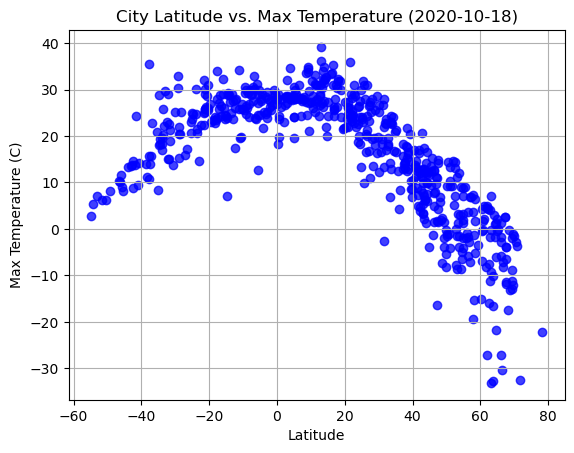

In [27]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
latitudes = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
#date = pd.to_datetime(city_data_df['Date'])
plt.scatter(latitudes,temp, marker = 'o', facecolors= 'blue', alpha = .75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2020-10-18)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

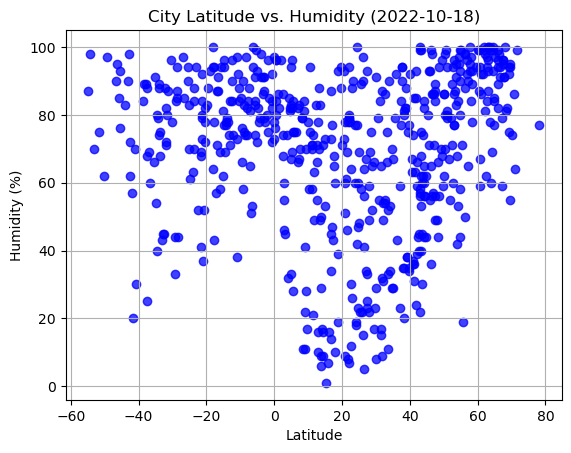

In [28]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitudes,humidity, marker = 'o', facecolors= 'blue', alpha = .75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

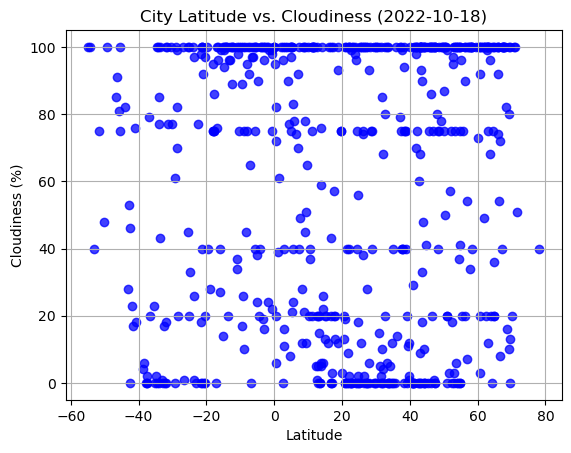

In [29]:
cloud = city_data_df["Cloudiness"]
plt.scatter(latitudes,cloud, marker = 'o', facecolors= 'blue', alpha = .75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

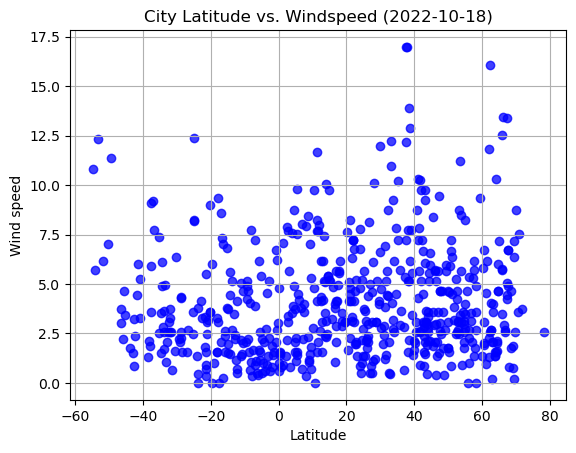

In [30]:
windspeed = city_data_df["Wind Speed"]
plt.scatter(latitudes,windspeed, marker = 'o', facecolors= 'blue', alpha = .75)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.title('City Latitude vs. Windspeed (2022-10-18)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def linreg(x,y):
    slope, int, r, p, std_err = stats.linregress(x,y)
    fit = slope*x + int
    return fit , slope, int, r, p ,std_err


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mont-tremblant,46.1949,-74.6264,7.77,36,86,2.06,CA,1711736609
3,vorkuta,67.5000,64.0000,-11.41,96,100,4.22,RU,1711737048
9,cottonwood,34.7392,-112.0099,20.79,29,12,4.47,US,1711736977
13,vilyuchinsk,52.9306,158.4028,-7.82,77,3,2.68,RU,1711737091
16,hamilton,39.1834,-84.5333,20.50,38,20,7.72,US,1711736643


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0), :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,15.14,82,100,3.76,ZA,1711737017
2,fale old settlement,-9.3852,-171.2468,29.35,76,17,4.90,TK,1711737022
4,adamstown,-25.0660,-130.1015,23.76,70,100,12.39,PN,1711737022
5,blackmans bay,-43.0167,147.3167,13.62,90,28,1.49,AU,1711737005
6,chonchi,-42.6128,-73.8092,14.56,62,46,3.25,CL,1711737057


###  Temperature vs. Latitude Linear Regression Plot

In [48]:
linreg(latitude_north, northern_hemi_df['Max Temp'])

(City_ID
 1       7.133703
 3      -6.302578
 9      14.358358
 13      2.885764
 16     11.555578
          ...    
 578    35.372086
 579    19.528512
 581    35.951663
 582    -0.551839
 583    33.784336
 Name: Lat, Length: 415, dtype: float64,
 -0.6306603095402034,
 36.266993072957504,
 -0.8765392543992839,
 3.1600078740742512e-133,
 0.01704089412887841)

The pearsons value is -0.8765392543992839


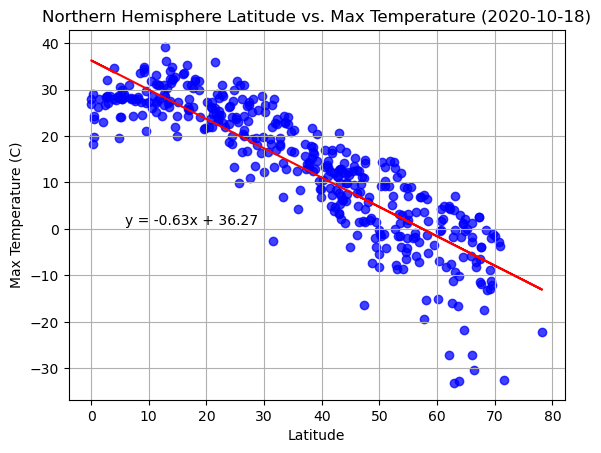

In [89]:
# Linear regression on Northern Hemisphere
latitude_north = northern_hemi_df['Lat']
a,b,c,d,e,f = linreg(latitude_north, northern_hemi_df['Max Temp'])
plt.scatter(latitude_north,northern_hemi_df['Max Temp'], marker = 'o', facecolors= 'blue', alpha = .75)
plt.plot(latitude_north,a, color = 'r') 
line_eq = f"y = {str(round(b,2))}x + {str(round(c,2))}"
plt.annotate(line_eq,(5.8,0.8))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere Latitude vs. Max Temperature (2020-10-18)')
plt.grid()
print(f"The pearsons value is {d}")

The pearsons value is 0.7173260603576936


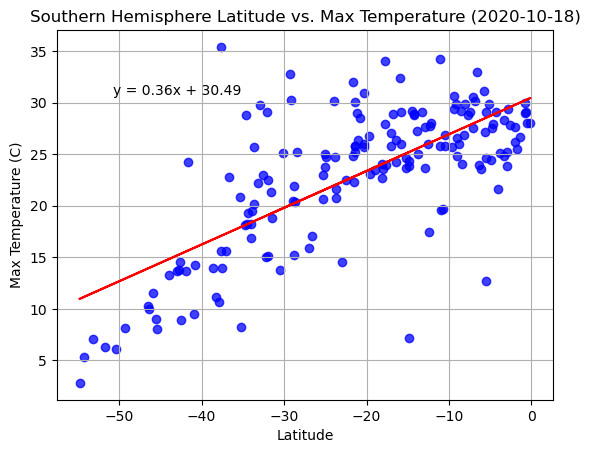

In [82]:
# Linear regression on Southern Hemisphere
latitude_south = southern_hemi_df['Lat']
a,b,c,d,e,f = linreg(latitude_south, southern_hemi_df['Max Temp'])
plt.scatter(latitude_south,southern_hemi_df['Max Temp'], marker = 'o', facecolors= 'blue', alpha = .75)
plt.plot(latitude_south,a, color = 'r') 
line_eq_south = f"y = {str(round(b,2))}x + {str(round(c,2))}"
plt.annotate(line_eq_south,(-50.8,30.8))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere Latitude vs. Max Temperature (2020-10-18)')
plt.grid()
print(f"The pearsons value is {d}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The pearsons value is 0.3612054109159992


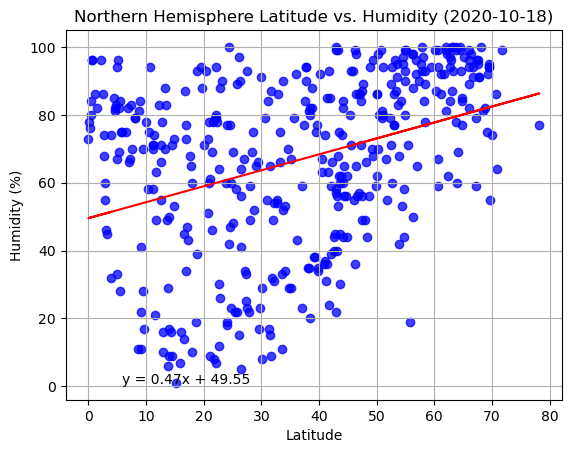

In [83]:
# Northern Hemisphere
a,b,c,d,e,f = linreg(latitude_north, northern_hemi_df['Humidity'])
plt.scatter(latitude_north,northern_hemi_df['Humidity'], marker = 'o', facecolors= 'blue', alpha = .75)
plt.plot(latitude_north,a, color = 'r') 
line_eq = f"y = {str(round(b,2))}x + {str(round(c,2))}"
plt.annotate(line_eq,(5.8,0.8))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs. Humidity (2020-10-18)')
plt.grid()
print(f"The pearsons value is {d}")

The pearsons value is 0.18458274867050825


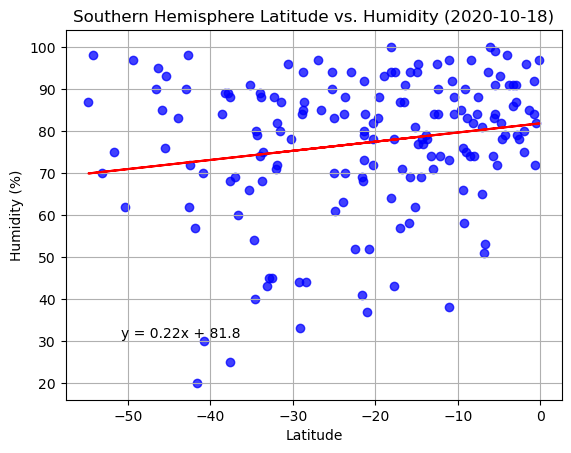

In [84]:
# Southern Hemisphere
a,b,c,d,e,f = linreg(latitude_south, southern_hemi_df['Humidity'])
plt.scatter(latitude_south,southern_hemi_df['Humidity'], marker = 'o', facecolors= 'blue', alpha = .75)
plt.plot(latitude_south,a, color = 'r') 
line_eq_south = f"y = {str(round(b,2))}x + {str(round(c,2))}"
plt.annotate(line_eq_south,(-50.8,30.8))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs. Humidity (2020-10-18)')
plt.grid()
print(f"The pearsons value is {d}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The pearsons value is 0.15687014993961737


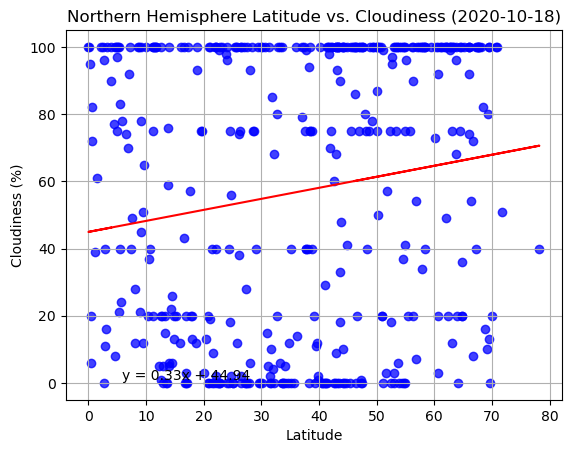

In [85]:
# Northern Hemisphere
a,b,c,d,e,f = linreg(latitude_north, northern_hemi_df['Cloudiness'])
plt.scatter(latitude_north,northern_hemi_df['Cloudiness'], marker = 'o', facecolors= 'blue', alpha = .75)
plt.plot(latitude_north,a, color = 'r') 
line_eq = f"y = {str(round(b,2))}x + {str(round(c,2))}"
plt.annotate(line_eq,(5.8,0.8))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Latitude vs. Cloudiness (2020-10-18)')
plt.grid()
print(f"The pearsons value is {d}")

The pearsons value is 0.2518421142519215


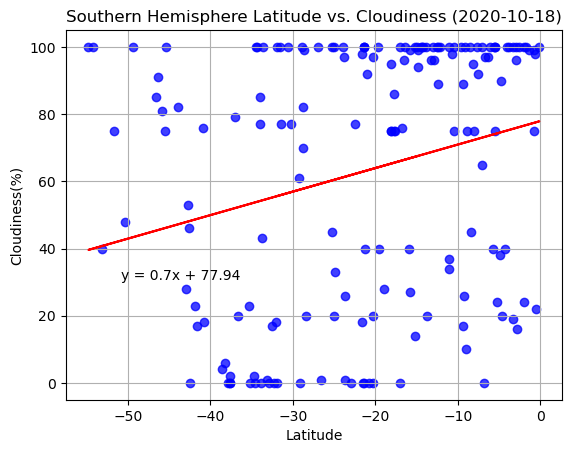

In [86]:
# Southern Hemisphere
a,b,c,d,e,f = linreg(latitude_south, southern_hemi_df['Cloudiness'])
plt.scatter(latitude_south,southern_hemi_df['Cloudiness'], marker = 'o', facecolors= 'blue', alpha = .75)
plt.plot(latitude_south,a, color = 'r') 
line_eq_south = f"y = {str(round(b,2))}x + {str(round(c,2))}"
plt.annotate(line_eq_south,(-50.8,30.8))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Southern Hemisphere Latitude vs. Cloudiness (2020-10-18)')
plt.grid()
print(f"The pearsons value is {d}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The pearsons value is 0.022812095337646714


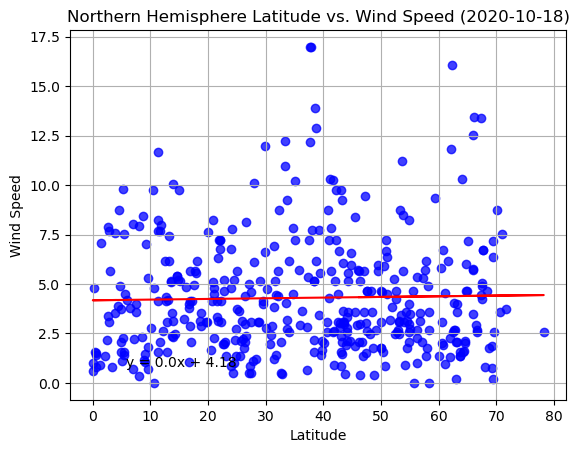

In [87]:
# Northern Hemisphere
a,b,c,d,e,f = linreg(latitude_north, northern_hemi_df['Wind Speed'])
plt.scatter(latitude_north,northern_hemi_df['Wind Speed'], marker = 'o', facecolors= 'blue', alpha = .75)
plt.plot(latitude_north,a, color = 'r') 
line_eq = f"y = {str(round(b,2))}x + {str(round(c,2))}"
plt.annotate(line_eq,(5.8,0.8))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs. Wind Speed (2020-10-18)')
plt.grid()
print(f"The pearsons value is {d}")

The pearsons value is -0.3005592111410359


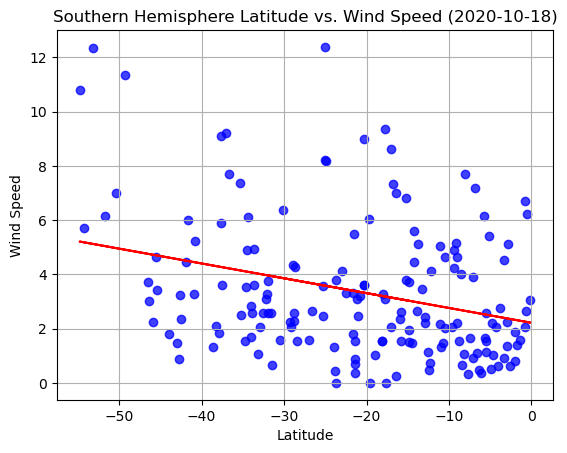

In [88]:
# Southern Hemisphere
a,b,c,d,e,f = linreg(latitude_south, southern_hemi_df['Wind Speed'])
plt.scatter(latitude_south,southern_hemi_df['Wind Speed'], marker = 'o', facecolors= 'blue', alpha = .75)
plt.plot(latitude_south,a, color = 'r') 
line_eq_south = f"y = {str(round(b,2))}x + {str(round(c,2))}"
plt.annotate(line_eq_south,(-50.8,30.8))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs. Wind Speed (2020-10-18)')
plt.grid()
print(f"The pearsons value is {d}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE